# Setting Environment

In [1]:
# !pip install datasets -q
# !pip install transformers -q
# !pip install accelerate -q
!pip install python-dotenv -q

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
from dotenv import load_dotenv
load_dotenv("creds.env")

project_path = os.getenv("PROJECT_PATH")
os.chdir(project_path)

In [9]:
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag, FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter

from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from skimage import feature, io, color

In [5]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Loading Data

In [6]:
# Function to read Caption file
def load_captions(captions_file):
    # Loading the captions into a DataFrame
    return pd.read_csv(captions_file, delimiter=',')

In [10]:
# Function to Load data
def load_dataset(image_dir, captions_df):

    # Dictionary to store the images and captions
    dataset = {}

    # Looping through the DataFrame and load images
    for index, row in tqdm(captions_df.iterrows()):
        image_path = os.path.join(image_dir, row['image'])
        try:
            image = Image.open(image_path)
            # Store the image and caption in the dictionary
            dataset[row['image']] = {'image': image, 'caption': row['caption']}
        except IOError:
            print(f"Error opening {image_path}")

    return dataset

image_dir = 'data/Images'
captions_file = 'data/captions.txt'

# Loading captions
captions_df = load_captions(captions_file)

# Loading the dataset
dataset = load_dataset(image_dir, captions_df)
print("Dataset loaded successfully.")

40455it [10:24, 64.76it/s]

Dataset loaded successfully.


# Data Exploration

In [11]:
# Display basic information about the dataset
print("Basic Information:")
print(captions_df.info())

# Display the first few rows of the dataset
print("\nFirst few captions:")
captions_df.head()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    40455 non-null  object
 1   caption  40455 non-null  object
dtypes: object(2)
memory usage: 632.2+ KB
None

First few captions:


,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [12]:
# Create a single string with all captions
all_captions = ' '.join(captions_df['caption'].tolist()).lower()

# Calculate the total number of words in the captions
words = all_captions.split()
print(f"\nTotal number of words in captions: {len(words)}")


Total number of words in captions: 476665


In [13]:
# Calculate the number of unique words
unique_words = set(words)
print(f"Number of unique words: {len(unique_words)}")

# Most common words
word_counts = Counter(words)
most_common = word_counts.most_common(10)
print("\nMost common words:")
print(most_common)

Number of unique words: 8918

Most common words:
[('a', 62986), ('.', 36577), ('in', 18974), ('the', 18418), ('on', 10743), ('is', 9345), ('and', 8851), ('dog', 8136), ('with', 7765), ('man', 7265)]


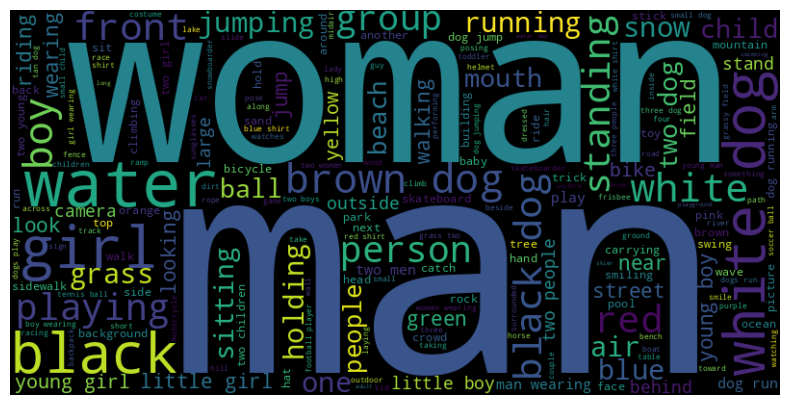

In [14]:
# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_captions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()